In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
# Raw Data
df = pd.read_csv(r'C:\Users\sun\Desktop\Data\ozone.csv')
display(df.head())

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [3]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB
None
Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64


In [4]:
# 결측치 제거
training_data = df[['Ozone', 'Solar.R', 'Wind', 'Temp']]
training_data.dropna(how='any',
                    inplace=True)
display(training_data.head())
print(training_data.info())
print(training_data.isna().sum())

,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
6,23.0,299.0,8.6,65


<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 152
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    111 non-null    float64
 1   Solar.R  111 non-null    float64
 2   Wind     111 non-null    float64
 3   Temp     111 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 4.3 KB
None
Ozone      0
Solar.R    0
Wind       0
Temp       0
dtype: int64


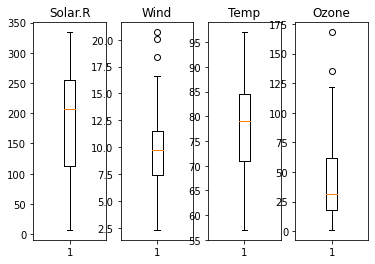

In [5]:
# 이상치 확인
figure = plt.figure()

ax1 = figure.add_subplot(1,4,1)
ax2 = figure.add_subplot(1,4,2)
ax3 = figure.add_subplot(1,4,3)
ax4 = figure.add_subplot(1,4,4)

ax1.set_title('Solar.R')
ax1.boxplot(training_data['Solar.R'])
ax2.set_title('Wind')
ax2.boxplot(training_data['Wind'])
ax3.set_title('Temp')
ax3.boxplot(training_data['Temp'])
ax4.set_title('Ozone')
ax4.boxplot(training_data['Ozone'])

plt.show()

In [6]:
zscore_threshold = 2.0
outlier = training_data['Ozone'][np.abs(stats.zscore(training_data['Ozone'])) > zscore_threshold]
training_data = training_data.loc[np.isin(training_data['Ozone'], outlier, invert=True)]

outlier = training_data['Wind'][np.abs(stats.zscore(training_data['Wind'])) > zscore_threshold]
training_data = training_data.loc[np.isin(training_data['Wind'], outlier, invert=True)]

training_data.describe()

,Ozone,Solar.R,Wind,Temp
count,101.000000,101.000000,101.000000,101.000000
mean,37.435644,183.485149,10.037624,77.574257
std,26.383107,92.012566,2.928339,9.175344
min,1.000000,7.000000,4.600000,58.000000
25%,18.000000,112.000000,7.400000,71.000000
50%,29.000000,201.000000,9.700000,78.000000
75%,50.000000,256.000000,11.500000,84.000000
max,108.000000,334.000000,16.600000,97.000000


In [8]:
# Training Data Set
x_data = training_data[['Solar.R', 'Wind', 'Temp']].values.reshape(-1,3)
y_data = training_data['Ozone'].values.reshape(-1,1)

# 정규화 처리
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaled_x = scaler_x.fit_transform(x_data)
scaled_y = scaler_y.fit_transform(y_data)

### python

In [13]:
# 수치미분
def numerical_derivative(f,x):

    delta_x = 1e-4
    derivative_x = np.zeros_like(x)

    # iterator를 이용해서 입력변수 x에 대한 편미분을 수행!
    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:

        idx = it.multi_index
        tmp = x[idx]

        x[idx] = tmp + delta_x
        fx_plus_delta = f(x)

        x[idx] = tmp - delta_x
        fx_minus_delta = f(x)

        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)

        x[idx] = tmp
        it.iternext()

    return derivative_x

W = np.random.rand(3, 1)
b = np.random.rand(1)

def loss_func(input_data):
    W = input_data[:-1].reshape(-1,1)
    b = input_data[-1:]
    
    y = np.dot(scaled_x, W) + b
    return np.mean(np.power(scaled_y-y, 2))

def predict(x):
    y = np.dot(x,W) + b
    return y

learning_rate = 1e-4

for step in range(300000):
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)
    
    W = W - derivative_result[:-1].reshape(-1,1)
    b = b - derivative_result[-1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b : {}, loss : {}'.format(W, b, loss_func(input_param)))

W : [[0.03633073]
 [0.81108474]
 [0.38360171]], b : [0.87767302], loss : 1.3574375953148132
W : [[-0.13208179]
 [ 0.19833051]
 [ 0.29413607]], b : [0.1837168], loss : 0.057863671158466634
W : [[-0.02204869]
 [ 0.00247554]
 [ 0.43244057]], b : [0.13982392], loss : 0.03350142929554638
W : [[ 0.04362386]
 [-0.11490649]
 [ 0.515087  ]], b : [0.11381518], loss : 0.024781886868003866
W : [[ 0.08279966]
 [-0.18531119]
 [ 0.56443001]], b : [0.09845484], loss : 0.02166096186049414
W : [[ 0.1061571 ]
 [-0.22758322]
 [ 0.59385207]], b : [0.08943137], loss : 0.020543845540472106
W : [[ 0.12007485]
 [-0.25300148]
 [ 0.61136181]], b : [0.08417189], loss : 0.020143934217679176
W : [[ 0.12836207]
 [-0.26831762]
 [ 0.6217518 ]], b : [0.08114227], loss : 0.02000073846775481
W : [[ 0.13329269]
 [-0.27757404]
 [ 0.62788981]], b : [0.07942864], loss : 0.019949440184260214
W : [[ 0.13622358]
 [-0.28319171]
 [ 0.63149156]], b : [0.07848744], loss : 0.019931045171225934


In [14]:
scaled_predict_data = scaler_x.transform([[150.0, 10.0, 80.0]])
scaled_result = predict(scaled_predict_data)
print(scaler_y.inverse_transform(scaled_result))

[[40.24281966]]


### sklearn

In [17]:
model = linear_model.LinearRegression()
model.fit(scaled_x, scaled_y)
scaled_predict_data = scaler_x.transform([[150.0, 10.0, 80.0]])
scaled_result = model.predict(scaled_predict_data)
print(scaled_result)
print(scaler_y.inverse_transform(scaled_result))

[[0.36658155]]
[[40.22422637]]


### Tensorflow

In [9]:
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
T = tf.placeholder(shape=[None, 1], dtype=tf.float32)

W = tf.Variable(tf.random.normal([3,1]))
b = tf.Variable(tf.random.normal([1]))

H = tf.matmul(X,W) + b

loss = tf.reduce_mean(tf.square(H-T))

train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(300000):
    _, W_val, b_val, loss_val = sess.run([train, W, b, loss],
                                        feed_dict={X:scaled_x,
                                                  T:scaled_y})
    if step % 30000 == 0:
        print('W : {}, b : {}, loss : {}'.format(W_val, b_val, loss_val))





W : [[0.9974517]
 [1.4445546]
 [1.9659557]], b : [1.2264862], loss : 9.681885719299316
W : [[0.06456918]
 [0.4383593 ]
 [1.0772084 ]], b : [-0.4438272], loss : 0.047472354024648666
W : [[0.09459341]
 [0.29156262]
 [1.0585034 ]], b : [-0.38363448], loss : 0.03858009725809097
W : [[0.11173327]
 [0.18426414]
 [1.0267829 ]], b : [-0.32760328], loss : 0.03323151171207428
W : [[0.12144262]
 [0.10315023]
 [0.9905711 ]], b : [-0.27694207], loss : 0.02969437837600708
W : [[0.12706009]
 [0.04007771]
 [0.95302016]], b : [-0.23165932], loss : 0.027197694405913353
W : [[ 0.130305  ]
 [-0.01033586]
 [ 0.91715723]], b : [-0.19169022], loss : 0.025379683822393417
W : [[ 0.13229957]
 [-0.05148062]
 [ 0.8839234 ]], b : [-0.15666577], loss : 0.02403154969215393
W : [[ 0.13358885]
 [-0.08559459]
 [ 0.8536572 ]], b : [-0.12601455], loss : 0.02302120067179203
W : [[ 0.13448292]
 [-0.11424918]
 [ 0.82651097]], b : [-0.099257], loss : 0.022260824218392372


In [10]:
predict_data = np.array([[150.0,10.0,80.0]])
scaled_predict_data = scaler_x.transform(predict_data)

scaled_result = sess.run(H, feed_dict={X:scaled_predict_data})
result = scaler_y.inverse_transform(scaled_result)
print(result)

[[40.952637]]
